###Decision Trees & Random Forests

In [17]:
from google.colab import files
uploaded=files.upload()

Saving data.csv to data (1).csv


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [20]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [22]:
dtree = DecisionTreeClassifier(max_depth=4, random_state=42)
dtree.fit(X_train, y_train)
y_pred_dt = dtree.predict(X_test)

In [23]:
print("Decision Tree Accuracy:",accuracy_score(y_test, y_pred_dt))
print("\nClassification Report (Decision Tree):\n",classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9473684210526315

Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



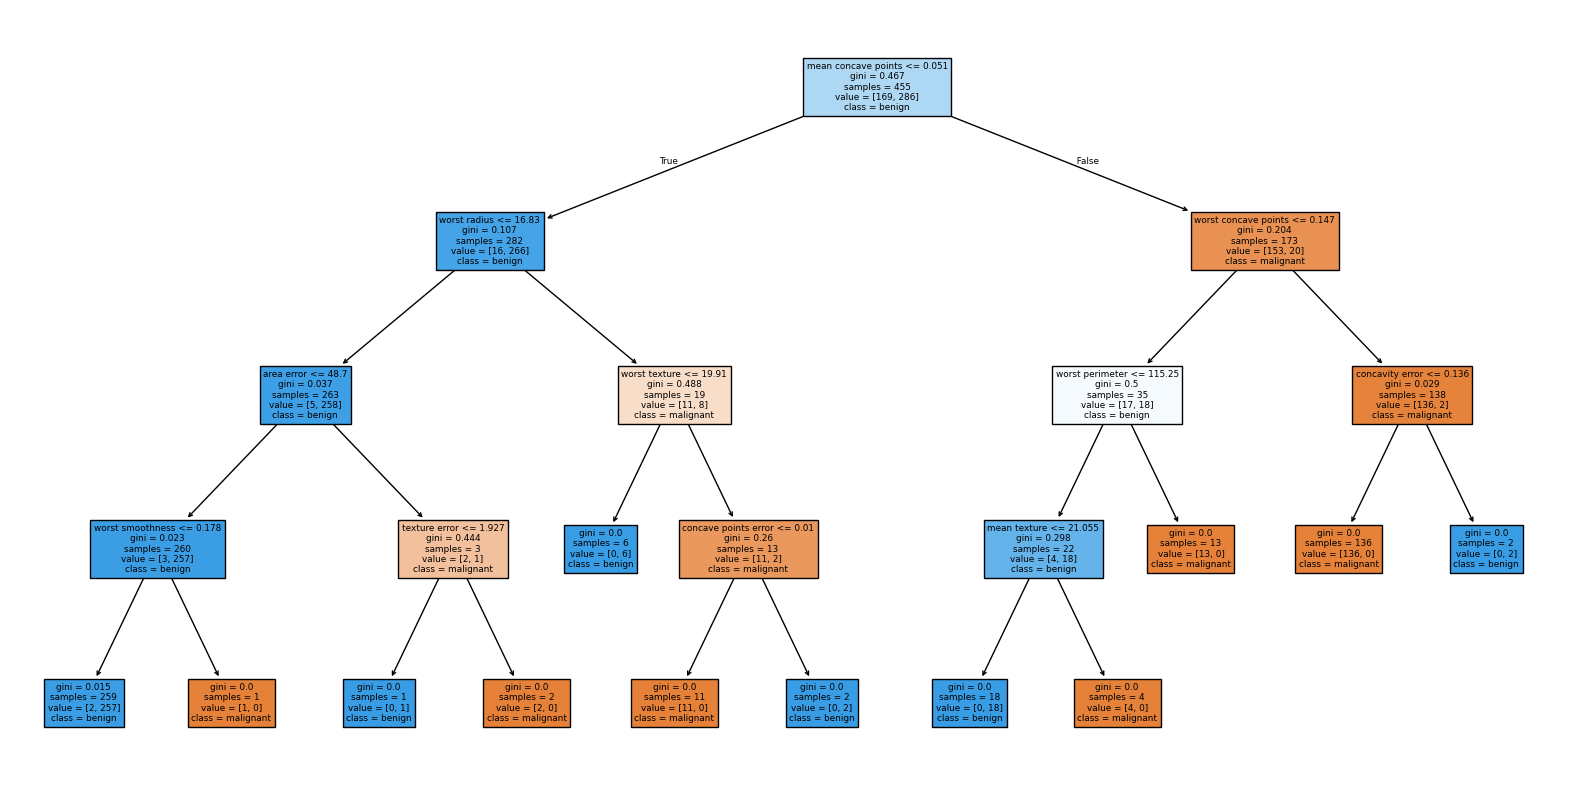

In [31]:
plt.figure(figsize=(20,10))
plot_tree(dtree, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.show()

In [25]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [26]:
print("Random Forest Accuracy:",accuracy_score(y_test, y_pred_rf))
print("\nClassification Report (Random Forest):\n",classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9649122807017544

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



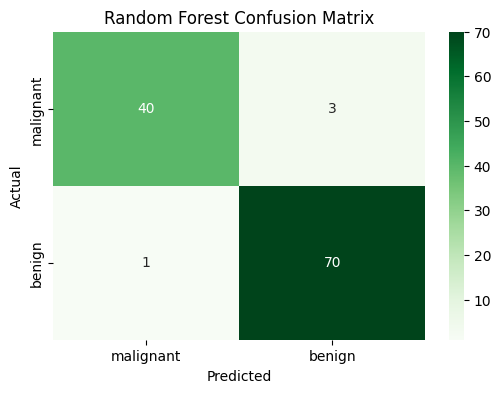

In [27]:
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt="d",cmap="Greens",xticklabels=data.target_names,yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

/tmp/ipython-input-4058744707.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices][:10], y=X.columns[indices][:10], palette="viridis")


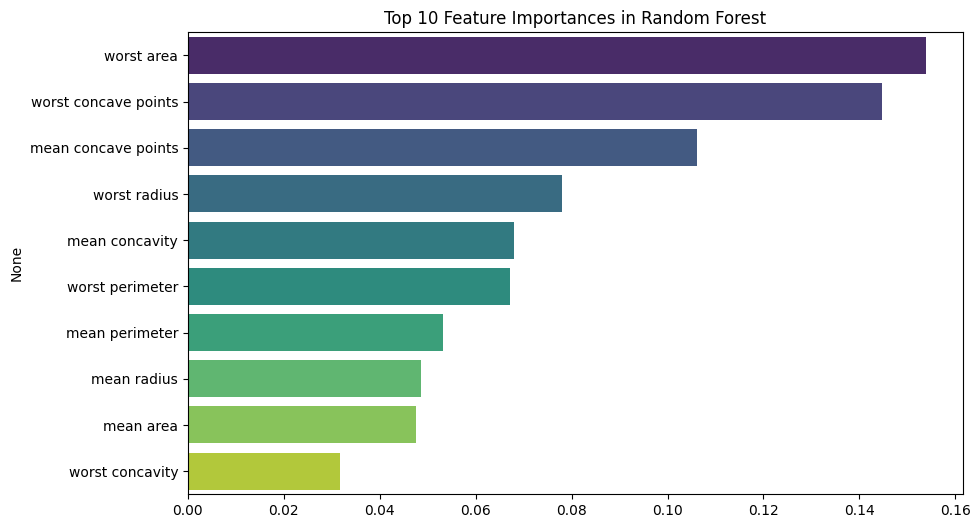

In [28]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices][:10], y=X.columns[indices][:10], palette="viridis")
plt.title("Top 10 Feature Importances in Random Forest")
plt.show()